#### WOS 기준 5597 개 
* search query : music* AND cognit*
* English only 
* 5597 개 with abs, title, author keywords

* Musical elements
    https://wmich.edu/mus-gened/mus150/Ch1-elements.pdf

In [1]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
from itertools import count
from matplotlib.colors import ListedColormap
import seaborn as sns
import itertools

In [2]:
df = pd.read_csv('20210330Wos_MusicCog.csv')

In [3]:
df.shape

(5597, 68)

In [4]:
df = df[df['Abstract'].notna()]
df = df.drop_duplicates(subset='DOI', keep="first")
music_features = ['rhythm', 'syncopation', 'accelerando','rubato','beat','duple meter','triple meter','quadruple meter', 'tempo', 
                  'largo', 'adagio', 'andante', 'moderato', 'allegro', 'presto' ,'syncopation',
                  'dynamics', 'forte', 'piano', 'pianissimo', 'mezzo', 'fortissimo','crescendo', 'decrescendo', 'accent',
                  'melody', 'pitch', 'theme', 'conjunct', 'disjunct',
                  'harmony', 'chord', 'progression', 'consonance', 'dissonance', 'tonality', 'atonality',
                  'tone', 'timbre','register', 'instrumentation',
                  'texture', 'monophonic', 'homophonic', 'polyphonic', 'counterpoint', 
                  'musical form','binary', 'ternary', 'strophic', 'through-composed',
                  'musical style', 'middle ages', 'renaissance', 'baroque', 'classic', 'romantic', 'modern'
                 ] 

In [5]:
df.shape

(4875, 68)

In [6]:
mid_cog = [
    'inattention',
    'hyperactivity',
    'impulsivity',
    'executive function',
    'working memory',
    'inhibition',
    'overactivity',
    'cognitive flexibility',
    'fluency',
    'verbal working memory', 
    'visuospatial working memory',
    'short term memory'
]

In [7]:
len(mid_cog)

12

In [8]:
new_df = pd.DataFrame()
matched = []

for i in range(len(df)):
    for j in music_features:
        if j in df.Abstract.iloc[i].lower():
            matched.append(j)
            new_df = new_df.append(df.iloc[i])
new_df.shape

(3693, 68)

In [31]:
new_df['music'] = matched

In [32]:
new_df2 = pd.DataFrame()
matched = []

for i in range(len(new_df)):
    for j in mid_cog:
        if j in new_df.Abstract.iloc[i].lower():
            matched.append(j)
            new_df2 = new_df2.append(new_df.iloc[i])
new_df2['cog'] = matched

In [33]:
new_df2.shape

(336, 70)

In [34]:
new_df2.to_csv('20210330Wos_features.csv',index=False)

In [9]:
new_df2 = pd.read_csv('20210330Wos_features.csv')

In [10]:
all_ = new_df2[['music', 'cog']]
all_ = all_.reset_index()

In [11]:
import numpy as np

nodes = []
for i in range(len(all_)):
    nodes.append((all_['music'][i], all_['cog'][i]))
    
node1 = []
node2 = []

for i in range(len(all_)):
    node1.append(all_['music'][i])
    node2.append(all_['cog'][i])
    
df = pd.DataFrame(columns=set(node1), index=set(node2))

from collections import Counter
from itertools import count

data = []

for k, v in Counter(nodes).items(): 
    data.append([k[1],k[0],v])
    
import networkx as nx

B = nx.Graph()

B.add_nodes_from(set(node1), bipartite=0) 
B.add_nodes_from(set(node2), bipartite=1)


for i in range(len(data)):
    B.add_edge(data[i][0], data[i][1], weight=data[i][2])
    
########### Weighted Bipartite

B_weight = nx.Graph()

for edge in B.edges(data='weight'):
    if edge[2] > 1:
        B_weight.add_edge(edge[0], edge[1], weight=edge[2])

########### Change B -> B_weight to draw weighted graph

from networkx.algorithms import bipartite

X, Y = bipartite.sets(B_weight)
edges= sorted(B_weight.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)

pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

{1: 0, 2: 1, 3: 2, 4: 3, 6: 4, 7: 5, 8: 6, 16: 7}


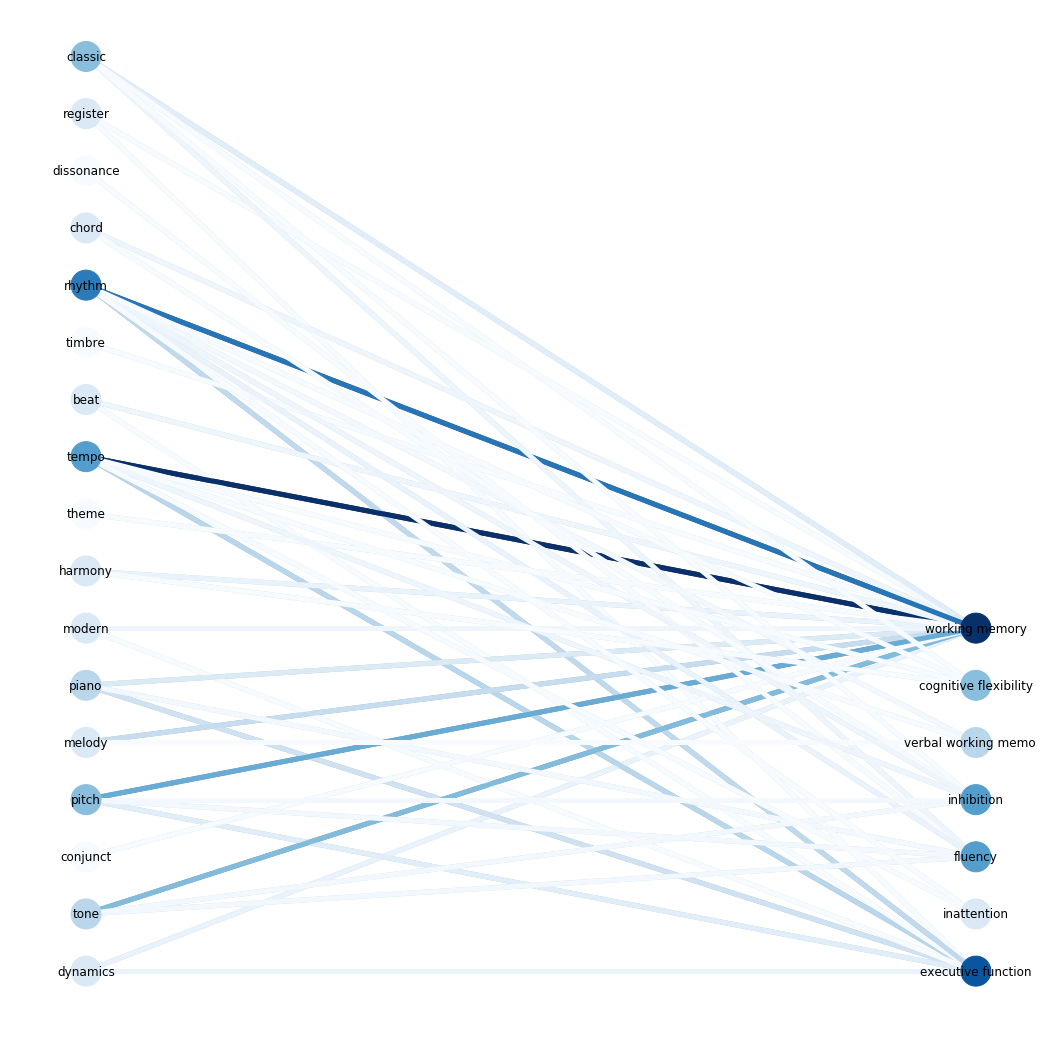

In [12]:
plt.figure(figsize=(14,14))


degrees = [val for (node, val) in B_weight.degree()]
nodes = B_weight.nodes()
groups = set(degrees)
mapping = dict(zip(sorted(groups), count()))
print(mapping)

node_colors = [mapping[val] for n in nodes for (node, val) in  B_weight.degree() if n is node]
edges, weights = zip(*nx.get_edge_attributes(B_weight,'weight').items())

num_edges = B_weight.number_of_edges()
num_nodes = B_weight.number_of_nodes()

me_map = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

nx.draw(B_weight, pos=pos, with_labels=True, node_size=900,
        edge_color=weights, 
        width=5,
        edge_cmap=me_map, 
        node_color=node_colors,
        cmap=plt.cm.Blues)

edges = nx.draw_networkx_edges(B_weight, pos, edge_color=weights, width=5,
                               edge_cmap=plt.cm.Blues)
# plt.colorbar(edges, aspect=50)

# Get the edge labels for ratings
edge_labels = nx.get_edge_attributes(B_weight,'weight')

# Draw the edge labels
# nx.draw_networkx_edge_labels(B_weight, pos, edge_labels=edge_labels)
plt.savefig('music_features2.jpg', bbox_inches='tight', dpi = 300)
plt.show()

In [3]:
# signal 분석하기 ??

In [13]:
edges=sorted(B_weight.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
edges

[('working memory', 'tempo', {'weight': 47}),
 ('working memory', 'rhythm', {'weight': 35}),
 ('working memory', 'pitch', {'weight': 25}),
 ('working memory', 'tone', {'weight': 22}),
 ('executive function', 'tempo', {'weight': 15}),
 ('executive function', 'rhythm', {'weight': 14}),
 ('working memory', 'melody', {'weight': 13}),
 ('executive function', 'piano', {'weight': 11}),
 ('working memory', 'piano', {'weight': 8}),
 ('executive function', 'pitch', {'weight': 7}),
 ('working memory', 'classic', {'weight': 7}),
 ('dynamics', 'executive function', {'weight': 5}),
 ('dynamics', 'working memory', {'weight': 5}),
 ('working memory', 'harmony', {'weight': 5}),
 ('fluency', 'rhythm', {'weight': 5}),
 ('working memory', 'chord', {'weight': 4}),
 ('working memory', 'beat', {'weight': 4}),
 ('working memory', 'modern', {'weight': 4}),
 ('fluency', 'classic', {'weight': 4}),
 ('inhibition', 'tempo', {'weight': 4}),
 ('inhibition', 'rhythm', {'weight': 4}),
 ('piano', 'fluency', {'weight': 

### Segmented Literature analysis

* We find out the features of the music, then can we get more specific information??
    * Like a n-gram approach ; [key_index-3:key_index+1] 

In [14]:
new = pd.read_csv('20210330Wos_features.csv')
new = new[['Abstract','Article Title', 'Publication Date','Author Full Names','music','cog']]
new

,Abstract,Article Title,Publication Date,Author Full Names,music,cog
0,Research has repeatedly demonstrated that peop...,"Musical expertise, musical style, and visual a...",NaN,"Jonasson, Petur; Kristjansson, Arni; Johanness...",rhythm,working memory
1,Research has repeatedly demonstrated that peop...,"Musical expertise, musical style, and visual a...",NaN,"Jonasson, Petur; Kristjansson, Arni; Johanness...",tempo,working memory
2,attention has been focused on physical exercis...,Positive Mood while Exercising Influences Bene...,FEB 1,"Suwabe, Kazuya; Hyodo, Kazuki; Fukuie, Takemun...",tempo,executive function
3,Congenital amusia in its most common form is a...,Influence of Background Musical Emotions on At...,JAN 25,"Fernandez, Natalia B.; Vuilleumier, Patrik; Go...",pitch,inhibition
4,Congenital amusia in its most common form is a...,Influence of Background Musical Emotions on At...,JAN 25,"Fernandez, Natalia B.; Vuilleumier, Patrik; Go...",dissonance,inhibition
5,Background and aims The purpose of this review...,Rewinding sarcopenia: a narrative review on th...,NaN,"Ekiz, Timur; Kara, Murat; Ata, Ayse Merve; Ric...",classic,inhibition
6,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",theme,executive function
7,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",theme,working memory
8,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",register,executive function
9,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",register,working memory


In [15]:
import re
# from nltk.stem.lancaster import LancasterStemmer

# st = LancasterStemmer()
abstract = new.Abstract.values.tolist()

prepro = []
# stem = []

for line in abstract:
    line = line.lower()
    line = re.sub(r'[^a-zA-Z ]', '', line)
#     temp = [st.stem(w) for w in line.split(' ')]
#     stem.append(temp)
    prepro.append(line)

In [16]:
len(prepro)

336

In [17]:
features = []

for i in range(len(prepro)):
    key = new.music.iloc[i]
    line = prepro[i].split(' ')
    for j in line:
        if key in j:
            index = line.index(j)
    temp = ' '.join(line[index-3:index+1])
    features.append(temp)
len(features)

336

In [18]:
new['features'] = features
new

,Abstract,Article Title,Publication Date,Author Full Names,music,cog,features
0,Research has repeatedly demonstrated that peop...,"Musical expertise, musical style, and visual a...",NaN,"Jonasson, Petur; Kristjansson, Arni; Johanness...",rhythm,working memory,traditional cmajor regular rhythms
1,Research has repeatedly demonstrated that peop...,"Musical expertise, musical style, and visual a...",NaN,"Jonasson, Petur; Kristjansson, Arni; Johanness...",tempo,working memory,cmajor regular rhythms contemporary
2,attention has been focused on physical exercis...,Positive Mood while Exercising Influences Bene...,FEB 1,"Suwabe, Kazuya; Hyodo, Kazuki; Fukuie, Takemun...",tempo,executive function,at a steady tempo
3,Congenital amusia in its most common form is a...,Influence of Background Musical Emotions on At...,JAN 25,"Fernandez, Natalia B.; Vuilleumier, Patrik; Go...",pitch,inhibition,by a musical pitch
4,Congenital amusia in its most common form is a...,Influence of Background Musical Emotions on At...,JAN 25,"Fernandez, Natalia B.; Vuilleumier, Patrik; Go...",dissonance,inhibition,musical mode or dissonance
5,Background and aims The purpose of this review...,Rewinding sarcopenia: a narrative review on th...,NaN,"Ekiz, Timur; Kara, Murat; Ata, Ayse Merve; Ric...",classic,inhibition,as well conclusion classical
6,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",theme,executive function,total score five themes
7,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",theme,working memory,total score five themes
8,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",register,executive function,study is a registered
9,Background Between 17 and 75% of breast cancer...,Comparison of a standard computer-assisted cog...,NaN,"Smith, Theresa M.; Wang, Wanyi",register,working memory,study is a registered


In [19]:
new2 = new.drop_duplicates(subset='features', keep="first")

In [20]:
new2.shape

(277, 7)

In [21]:
features_doc = ' '.join(features)

In [22]:
from collections import Counter
feat_wc_dict = Counter(features_doc.split(' '))
feat_wc_dict.most_common(50)

[('of', 63),
 ('temporal', 53),
 ('and', 52),
 ('the', 52),
 ('rhythm', 40),
 ('in', 40),
 ('pitch', 34),
 ('a', 33),
 ('melody', 28),
 ('piano', 25),
 ('rhythmic', 24),
 ('to', 21),
 ('', 14),
 ('tone', 14),
 ('music', 14),
 ('musical', 12),
 ('classical', 12),
 ('tones', 12),
 ('or', 11),
 ('dynamics', 11),
 ('tempo', 10),
 ('beat', 9),
 ('harmony', 9),
 ('that', 8),
 ('on', 8),
 ('rhythms', 7),
 ('as', 7),
 ('with', 7),
 ('chord', 7),
 ('tests', 7),
 ('is', 6),
 ('left', 6),
 ('cognitive', 6),
 ('training', 6),
 ('superior', 6),
 ('brain', 5),
 ('neural', 5),
 ('auditory', 5),
 ('intense', 5),
 ('frontal', 5),
 ('for', 5),
 ('modern', 5),
 ('examined', 5),
 ('whether', 5),
 ('at', 4),
 ('compare', 4),
 ('performance', 4),
 ('group', 4),
 ('model', 4),
 ('induce', 4)]

In [23]:
tempo = new2[new2['music'] == 'rhythm']
tempo.shape

(54, 7)

In [24]:
tempo.features

0           traditional cmajor regular rhythms
11       subtests melody discrimination rhythm
16                    of movement music rhythm
23                 effectiveness of a rhythmic
25      compare cognitive performance rhythmic
42            aural presentation styles rhythm
44               processing of auditory rhythm
50                 cognitive work with rhythms
55                      seen that the rhythmic
56               educationand is called rhythm
71                         of pitch and rhythm
73                  their melodic and rhythmic
75                music is inherently rhythmic
83                        sessions of a rhythm
86                 visual attention and rhythm
90                    memory or musical rhythm
100                  agenormed tests of rhythm
106                 sensitivity to beat rhythm
111                musical tests melody rhythm
117                     content and its rhythm
133                 switching and music rhythm
134          